In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('customer_data_records.csv')

# Display the first few rows of the dataset
print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [3]:
# Extract relevant features for clustering
X = data.iloc[:, [1, 2,]].values  # Select columns 1 and 2 as 'Annual Income' and 'Spending Score' for all rows

In [4]:
# Feature scaling - it is important to scale the features before clustering
scaler = StandardScaler() # Create a StandardScaler object
X_scaled = scaler.fit_transform(X)  # Standardize the features to have mean=0 and variance=1

In [5]:
# Determine the optimal number of clusters using the Elbow method
wcss = []  # List to store the within-cluster sum of squares
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)  # Create KMeans object with i clusters
    kmeans.fit(X_scaled)  # Fit the model to the scaled data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

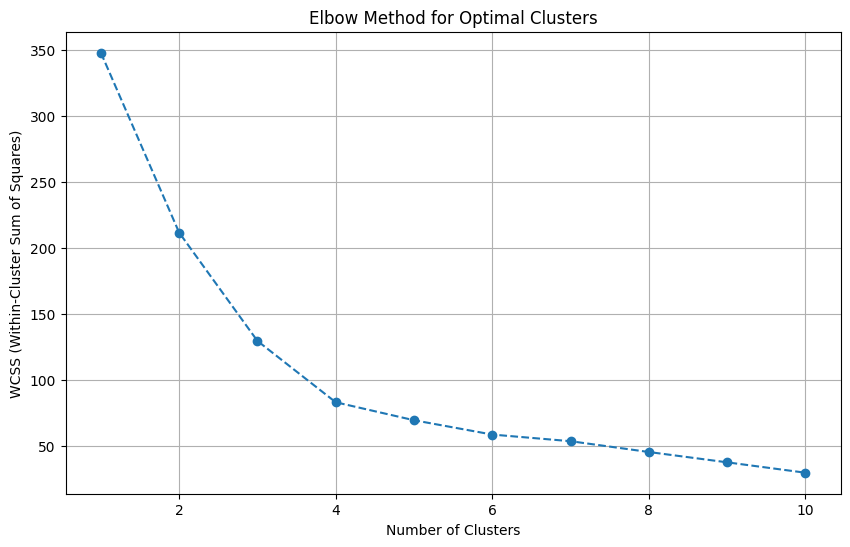

In [6]:
# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [7]:
# Base on the Elbow method, let's assume the optimal number of clusters is 5
optimal_clusters = 5  # let say we determined 5 clusters from the Elbow method

# Apply K-Means clustering with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42) # Create KMeans object with optimal clusters
kmeans.fit(X_scaled)  # Fit the model to the scaled data

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [8]:
# Apply the K-means with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, random_state=42)  # Create KMeans object with optimal clusters
y_kmeans = kmeans.fit_predict(X_scaled)  # Predict the cluster labels for the scaled data


In [9]:
# Add cluster labels to the original data
data['Cluster'] = y_kmeans # Creates new column 'Cluster' in the data DataFrame